<div class="frontmatter text-center">
<h1>Geospatial Data Science</h1>
<h2>App</h2>
<h4>IT University of Copenhagen, Spring 2022</h4>
<h4>Group: Nina Sand Horup & Ida Thrane</h4>
</div>

# Input parameters from user

In [ ]:
# Input parameters for the user

current_position = #(some_coordinates)
time_of_day = #Choose between two time slots
preference_activity = #Choose between active participation/nature experience

# Import libraries

In [1]:
# import libraries needed
import geopandas as gpd
import osmnx as ox
import networkx as nx
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon, LineString

# libraries for plotting
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm



%matplotlib inline
ox.__version__

'1.0.1'

In [2]:
# Plotting parameters

current_position_color = 'red'
restaurant_color = 'magenta' # limegreen
bar_color = 'darkorange'
attraction_color = 'blue'

# Functions

In [3]:
def graph_cols_to_float(G, cols):
    for i, j, key, data in G.edges(keys = True, data = True):
        for col in cols:
            data[col] = float(data[col])

# Import preprocessed data from 'database'

Import graph

In [4]:
## Import graph data from folder

G = ox.io.load_graphml("./data/graphs/G_copenhagen_preprocessed")


In [5]:
cols_to_float = ['use_cost', 'speed_cost', 'park_gain', 'water_gain', 'total_cost']
graph_cols_to_float(G, cols_to_float)

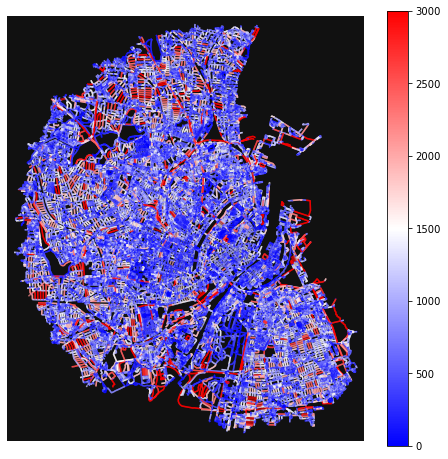

In [7]:
# Making colour scale
norm = matplotlib.colors.Normalize(vmin=0, vmax=3000)
cmap = cm.bwr
m = cm.ScalarMappable(norm=norm, cmap=cmap)

edge_cost_colors = [m.to_rgba(data["total_cost"]) for u, v, key, data in G.edges(keys=True, data=True)]

# Plotting the figure
    
fig, ax = ox.plot_graph(G, node_size=0, edge_color=edge_cost_colors, edge_linewidth=1.5, edge_alpha=0.7,show=False, close=False)

fig.colorbar(m, ax = ax, orientation='vertical')
plt.show()

Import destinations

In [ ]:
destinations_cph= gpd.read_file("data/geometries/destinations_copenhagen_preprocessed.json")
destinations_cph=destinations_cph.set_index("id")

Import parks and water

In [8]:
water_cph= gpd.read_file("data/geometries/water_copenhagen_subset.json")
water_cph=water_cph.set_index("id")

In [9]:
parks_cph= gpd.read_file("data/geometries/parks_copenhagen_subset.json")
parks_cph=parks_cph.set_index("id")

# Get subset of destinations with 1500 m. of the user

# Get distance to nearest park/water and get subset

**Get 10 restaurants closest to nature**

In [ ]:
restaurants_distances_to_nature, restaurants_nearest_nature, restaurants_nearest_nature_type = dist_to_nearest_nature(list(restaurants["coordinates"]), water_subset, parks_subset)

# Apply to gdf
restaurants["dist_to_nature"] = restaurants_distances_to_nature
restaurants["nearest_nature"] = restaurants_nearest_nature
restaurants["nearest_nature_type"] = restaurants_nearest_nature_type

print("min", min(restaurants_distances_to_nature), "max", max(restaurants_distances_to_nature), "mean", np.mean(restaurants_distances_to_nature))



**Get 10 bars closest to nature**

In [ ]:
bars_distances_to_nature, bars_nearest_nature, bars_nearest_nature_type = dist_to_nearest_nature(list(bars["coordinates"]), water_subset, parks_subset) # Do it for restaurants etc.

# Apply to gdf
bars["dist_to_nature"] = bars_distances_to_nature
bars["nearest_nature"] = bars_nearest_nature
bars["nearest_nature_type"] = bars_nearest_nature_type



**Get 10 attractions closest to nature**

In [ ]:
attractions_distances_to_nature, attractions_nearest_nature, attractions_nearest_nature_type = dist_to_nearest_nature(list(attractions["coordinates"]), water_subset, parks_subset) # Do it for restaurants etc.

# Apply to gdf
attractions["dist_to_nature"] = attractions_distances_to_nature
attractions["nearest_nature"] = attractions_nearest_nature
attractions["nearest_nature_type"] = attractions_nearest_nature_type



**Get indexes**

If threshold method (only for visualization)

In [ ]:
# Get the indexes of the 10 destinations closest to nature: 

indexes_restaurants = np.argsort(restaurants_distances_to_nature)[:10]

restaurant_node_ids_nature = np.array(restaurant_node_ids)[indexes_restaurants] 

restaurant_node_ids_nature_and_current_position = np.append(restaurant_node_ids_nature, current_node)


# Get the indexes of the 10 bars closest to nature: 

indexes_bars = np.argsort(bars_distances_to_nature)[:10]

bar_node_ids_nature = np.array(bar_node_ids)[indexes_bars] 

bar_node_ids_nature_and_current_position = np.append(bar_node_ids_nature, current_node)



# Get the indexes of the 10 bars closest to nature: 

indexes_attractions = np.argsort(attractions_distances_to_nature)[:10]

attraction_node_ids_nature = np.array(attraction_node_ids)[indexes_attractions] 

attraction_node_ids_nature_and_current_position = np.append(attraction_node_ids_nature, current_node)




**Plot**

In [ ]:
# Plotting all top 10 

# create node weights 
node_weights = [50 if (node in restaurant_node_ids_nature_and_current_position) or (node in bar_node_ids_nature_and_current_position) or (node in attraction_node_ids_nature_and_current_position) else 0 for node in U.nodes]

node_colours = [current_position_color if node == current_node else restaurant_color if node in restaurant_node_ids_nature else bar_color if node in bar_node_ids_nature else attraction_color if node in attraction_node_ids_nature else 'white' for node in U.nodes]

# Plot

# We plot the nodes which minimizes the distance to the coordinates to check that the method works
fig, ax = ox.plot_graph(U, node_size=node_weights, node_color = node_colours,  edge_color="black", edge_linewidth=1, edge_alpha=0.6, bgcolor = 'white', show = False, close = False);

water_subset.plot(color="blue", linewidth=1, ax=ax, alpha = 0.4)
parks_subset.plot(color="green", linewidth=1, ax=ax, alpha = 0.4)


ax.set_title("Top 10 restaurants, bar, attractions", fontsize = 15)


if use == "big":
    plt.savefig('./plots/Copenhagen/top10_restaurants_bars_attractions.png')
    
if use == "small":
    plt.savefig('./plots/Subset/top10_restaurants_bars_attractions.png')
    
plt.show()


# Choosing three good combinations of destinations for routing

In [ ]:
a = attraction_node_ids_nature
b = bar_node_ids_nature
c = restaurant_node_ids_nature

In [ ]:
a_b_c = np.append(a, np.append(b, c))

#### Make list of all possible permutations: 

In [ ]:
all_permutations = []

for i in range(len(a)):
    for j in range(len(b)):
        for k in range(len(c)):
            #print(i,j,k)

            all_permutations.append((i,j,k))

print(len(all_permutations))


#### Remove routes where points are too close or too far

Stop if we get to less than 20 routes

In [ ]:
from pyproj import Geod
geod = Geod(ellps="WGS84")


In [ ]:
irrelevant_permutations = []
relevant_permutations = []

for i in range(len(a)):
    #print("i", i)
    
    node1 = a[i]
    point1 = Point(U.nodes[node1]["y"], U.nodes[node1]["x"])
    
    for j in range(len(b)):
        #print("j", j)
        
        node2 = b[j]
        point2 = Point(U.nodes[node2]["y"], U.nodes[node2]["x"])
        
        line_string12 = LineString([point1, point2])
        dist12 = geod.geometry_length(line_string12)
        #print(dist12)
        for k in range(len(c)):
            #print("k", k)
            #print(i,j,k)
            
            node3 = c[k]
            point3 = Point(U.nodes[node3]["y"], U.nodes[node3]["x"])
            
            line_string13 = LineString([point1, point3])
            dist13 = geod.geometry_length(line_string13)
            line_string23 = LineString([point2, point3])
            dist23 = geod.geometry_length(line_string23)
            
            if len(all_permutations) - len(irrelevant_permutations) > 15:
                if (dist12 > 300) and (dist12 < 1500) and (dist13 > 300) and (dist13 < 1500) and (dist23 > 300) and (dist23 < 1500):
                    relevant_permutations.append([node1,node2,node3])
                else: 
                    irrelevant_permutations.append([node1,node2,node3])
            else:
                relevant_permutations.append([node1,node2,node3])


In [ ]:
if len(relevant_permutations) < 16:
    final_routes = relevant_permutations

#### Cherrypick routes based on nature data

Only do this step if we have more than 15 routes

Steps: 
- only include routes which are close to both water and park
- if the upper condition renders less than 15 routes, we pick a random subset of other routes untill we have 15 candidates. 

In [ ]:
# Make a subset of U which only contains the top-10 restaurants, bars and attractions

if len(relevant_permutations) > 15:
    U_nodes_subset = []
    U_nodes_data_subset = []

    for node in U.nodes:
        if node in a_b_c:
            U_nodes_subset.append(node)
            U_nodes_data_subset.append(U.nodes[node])

    U_subset_coords = []
    for data in U_nodes_data_subset:
        tup = (data["y"], data["x"])
        U_subset_coords.append(tup)

    # Get nearest nature for all nodes in this subset:

    U_subset_distances_to_nature, U_subset_nearest_nature, U_subset_nearest_nature_type = dist_to_nearest_nature(U_subset_coords, water_subset, parks_subset) 

    # Get routes where nature type differs
    nature_type_permutations = []
    non_nature_type_permutations = []

    for i in relevant_permutations:
        a_r = i[0]
        a_index = np.ravel(np.where(np.asarray(U_nodes_subset)==a_r))[0]
        a_nature_type = U_subset_nearest_nature_type[a_index]

        b_r = i[1]
        b_index = np.ravel(np.where(np.asarray(U_nodes_subset)==b_r))[0]
        b_nature_type = U_subset_nearest_nature_type[b_index]

        c_r = i[2]
        c_index = np.ravel(np.where(np.asarray(U_nodes_subset)==c_r))[0]
        c_nature_type = U_subset_nearest_nature_type[c_index]

        list_of_nature = [a_nature_type, b_nature_type, c_nature_type]

        if len(set(list_of_nature)) > 1: 
            nature_type_permutations.append(i)
        else: 
            non_nature_type_permutations.append(i)

    print(len(nature_type_permutations))

    

Add a random subset if we have less than 15 routes: 

In [ ]:
if len(relevant_permutations) > 15 and len(nature_type_permutations) < 15:
    routes_to_add = 15 - len(nature_type_permutations)
    
    random_subset = np.random.choice(np.arange(0,len(non_nature_type_permutations), 1), size = routes_to_add)
    
    random_routes = np.asarray(non_nature_type_permutations)[random_subset]

    final_routes = np.concatenate((nature_type_permutations, random_routes), axis=0)
    
    print(len(final_routes))

# Making the route


In [ ]:
# Get three routes out of the 15 (change random seed to get three new proposals)

# Get random route: 

route1_num = np.random.choice(np.arange(0,len(final_routes), 1), size = 1)
route1 = np.asarray(final_routes)[route1_num][0]

print(route1)

# Get subset of routes where as few as possible of the destinations are the same as route1: 
unique_items = []

for route2 in final_routes:
    route12 = np.append(route1, route2)
    unique_items.append(len(set(route12)))

indices_best = np.where(unique_items == np.max(unique_items))
route2_num = np.random.choice(indices_best[0])
route2 = np.asarray(final_routes)[route2_num]
print(route2)

# Get subset of routes where as few as possible of the destinations are the same as route1 and route2: 
unique_items_2 = []

for route3 in final_routes:
    route123 = np.append(route1, np.append(route2, route3))
    unique_items_2.append(len(set(route123)))

indices_best_2 = np.where(unique_items_2 == np.max(unique_items_2))
route3_num = np.random.choice(indices_best_2[0])
route3 = np.asarray(final_routes)[route3_num]
print(route3)



In [ ]:
final_routes_subset = (route1, route2, route3)


In [ ]:
route_N = 0 # 0, 1, 2
orig_id = current_node
id_0 = final_routes_subset[route_N][0] #attraction
id_1 = final_routes_subset[route_N][1] #bar
id_2 = final_routes_subset[route_N][2] #restaurant

### Information on this route: 

Here we print which attraction, bar and restaurant the route visits.



In [ ]:
attraction_visited = attractions[attractions["nearest node"] == id_0]
bar_visited = bars[bars["nearest node"] == id_1]
restaurant_vsisited = restaurants[restaurants["nearest node"] == id_2]


print("Then you go to the bar ", " ' ", bar_visited.name.values[0] , " ' ")

print("Then you go to the restaurant ", " ' ", restaurant_vsisited.name.values[0] , " ' ")

attraction_string = f"First you visit the {attraction_visited.tourism.values[0]} '{attraction_visited.name.values[0]}'"
total_string


# Calculating the route (length only)

In [ ]:
route1 = ox.shortest_path(U, orig_id, id_0, weight="length")
route2 = ox.shortest_path(U, id_0, id_1, weight="length")
route3 = ox.shortest_path(U, id_1, id_2, weight="length")

routes = [route1, route2, route3]

route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(U, route1, "length")))
route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(U, route2, "length")))
route3_length = int(sum(ox.utils_graph.get_route_edge_attributes(U, route3, "length")))

print("The total route is", route1_length + route2_length + route3_length, "meters.")

# We plot the nodes which minimizes the distance to the coordinates to check that the method works
# create node weights 
node_weights = [50 if (node == orig_id) or (node == id_0) or (node == id_1) or (node == id_1) else 0 for node in U.nodes]

node_colours = [current_position_color if node == current_node else attraction_color if node == id_0 else bar_color if node == id_1 else restaurant_color if node == id_2 else 'white' for node in U.nodes]

fig, ax = ox.plot_graph_routes(U, routes, route_colors=[attraction_color, bar_color, restaurant_color], node_size=node_weights, node_color = node_colours,  edge_color="black", edge_linewidth=1, edge_alpha=0.6, bgcolor = 'white', show = False, close = False);

parks_subset.plot(color="green", linewidth=1, ax=ax, alpha = 0.4)
water_subset.plot(color="blue", linewidth=1, ax=ax, alpha = 0.4)


ax.set_title("Route", fontsize = 15)

plt.show()


# Making a new route with the new attributes

In [ ]:
route1 = ox.shortest_path(U, orig_id, id_0, weight="total_cost")
route2 = ox.shortest_path(U, id_0, id_1, weight="total_cost")
route3 = ox.shortest_path(U, id_1, id_2, weight="total_cost")

routes = [route1, route2, route3]

route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(U, route1, "length")))
route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(U, route2, "length")))
route3_length = int(sum(ox.utils_graph.get_route_edge_attributes(U, route3, "length")))

print("The total route is", route1_length + route2_length + route3_length, "meters.")

# We plot the nodes which minimizes the distance to the coordinates to check that the method works
# create node weights 
node_weights = [50 if (node == orig_id) or (node == id_0) or (node == id_1) or (node == id_1) else 0 for node in U.nodes]

node_colours = [current_position_color if node == current_node else attraction_color if node == id_0 else bar_color if node == id_1 else restaurant_color if node == id_2 else 'white' for node in U.nodes]

fig, ax = ox.plot_graph_routes(U, routes, route_colors=[attraction_color, bar_color, restaurant_color], node_size=node_weights, node_color = node_colours,  edge_color="black", edge_linewidth=1, edge_alpha=0.6, bgcolor = 'white', show = False, close = False);

parks_subset.plot(color="green", linewidth=1, ax=ax, alpha = 0.4)
water_subset.plot(color="blue", linewidth=1, ax=ax, alpha = 0.4)


ax.set_title("Route", fontsize = 15)

plt.show()
